# Summarize dominant bacteria by coral host genus

The goal of this notebook is to summarize the dominant bacteria in corals. Ecological dominance is often reported as the relative abundance of the most common taxon. In keeping with this usage, by 'dominant' we simply mean the most abundant type of microbe. The output will be a chart of the proportion of coral genera in which each bacterial taxon was dominant (regardless of its exact abundance). 

Because coral microbiomes differ by tissue type, we summarize dominance separately for each tissue type.



## Load the trait table

The GCMP trait table summarizes disease and microbiome data for each coral genus in the study. 
We will use it as a starting point for the analysis. 

In [1]:
import pandas as pd
merged_table = pd.read_csv("../output/GCMP_trait_table_with_abundances_and_adiv_and_metadata.tsv",sep="\t")
merged_table = merged_table.set_index('host_genus')
merged_table

,host_genus.1,sum_total,sum_dis,sum_healthy,sum_bbd,sum_wd,perc_healthy,perc_dis,perc_bbd,perc_wd,...,surface_temperature,temperature,tissue_loss_percent,turf_contact_percent,Competitive,Generalist,Missing:_Not_collected,Stress_tolerant,Unknown,Weedy
host_genus,,,,,,,,,,,,,,,,,,,,,
Acanthastrea,Acanthastrea,109.0,0.0,99.0,0.0,0.0,90.825688,0.000000,0.000000,0.000000,...,NaN,25.545000,1.166667,2.500000,0,0,0,1,0,0
Acropora,Acropora,31786.0,1158.0,27465.0,179.0,171.0,86.405965,3.643113,0.563141,0.537973,...,NaN,26.401146,NaN,NaN,1,0,0,0,0,0
Aiptasia,Aiptasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.800000,0.000000,0.000000,0,0,1,0,0,0
Alveopora,Alveopora,267.0,2.0,262.0,0.0,1.0,98.127341,0.749064,0.000000,0.374532,...,NaN,20.000000,0.000000,0.000000,0,0,1,0,0,0
Astrea,Astrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.000000,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stylophora,Stylophora,895.0,33.0,710.0,4.0,3.0,79.329609,3.687151,0.446927,0.335196,...,NaN,24.790909,NaN,NaN,0,0,0,0,0,1
Tubastraea,Tubastraea,220.0,2.0,215.0,0.0,1.0,97.727273,0.909091,0.000000,0.454545,...,NaN,26.769677,0.000000,0.645161,0,0,1,0,0,0
Tubipora,Tubipora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.100000,30.000000,0.000000,0,0,1,0,0,0


## Examine the columns of the trait table

For reference, we will print out the many columns of data in the merged trait table, so we have a sense of what types of data are available to work with.

In [2]:
print(sorted([t for t in list(merged_table.columns)]))

['Colony.maximum.diameter', 'Colony_maximum_GCMP_recorded', 'Colony_maximum_diameter', 'Colony_maximum_diameter_universal', 'Competitive', 'Corallite.width.maximum', 'Corallite.width.minimum', 'Depth.lower', 'Depth.upper', 'Eastern.most.range.edge', 'Generalist', 'Missing:_Not_collected', 'Northern.most.range.edge', 'Oocyte.size.at.maturity', 'Propagule.size.on.release.max', 'Propagule.size.on.release.mean', 'Range.size', 'Skeletal.density', 'Species.age.phylogeny', 'Stress_tolerant', 'Unknown', 'Weedy', 'Western.most.range.edge', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales___D_4__Nitrosopumilaceae', 'all_D_0__Archaea___D_1__Thaumarchaeota___D_2__Nitrososphaeria___D_3__Nitrosopumilales___D_4__Nitrosopumilaceae___D_5__Candidatus_Nitrosopumilus', 'all_D_0__Bacteria', 'all_D_0__Bacteria___D_1__Bacteroidetes', 'all_D_0__Bacteria___D_1__Bacteroidetes___D_2__Bac

## Reduce the dataframe

For this analysis, we just need to know the most dominant families in coral mucus, tissue and skeleton, which have already been calculated. So we'll filter the DataFrame to just those columns.

In [3]:
merged_table = merged_table[\
  [ 'host_clade_sensu_fukami',
    'most_abundant_family_mucus',
   'most_abundant_family_tissue',
   'most_abundant_family_skeleton',
   'most_abundant_genus_mucus', 
   'most_abundant_genus_skeleton',
   'most_abundant_genus_tissue',
   'most_abundant_class_mucus',
    'most_abundant_class_tissue',
    'most_abundant_class_skeleton',
    'most_abundant_genus_all']]
merged_table

,host_clade_sensu_fukami,most_abundant_family_mucus,most_abundant_family_tissue,most_abundant_family_skeleton,most_abundant_genus_mucus,most_abundant_genus_skeleton,most_abundant_genus_tissue,most_abundant_class_mucus,most_abundant_class_tissue,most_abundant_class_skeleton,most_abundant_genus_all
host_genus,,,,,,,,,,,
Acanthastrea,XX,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Chlorobi...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...
Acropora,VI,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...
Aiptasia,Outgroup_Cnidaria_Anthozoa_Actiniaria_Aiptasiidae,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,NaN,NaN,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,NaN,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...
Alveopora,VI,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Planctomycetes;D_2__Plancto...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,Unassigned;__;__;__;__;__,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...
Astrea,XVII,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,Unassigned;__;__;__;__,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,Unassigned;__;__;__;__;__,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,Unassigned;__;__,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...
...,...,...,...,...,...,...,...,...,...,...,...
Stylophora,X,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...
Tubastraea,II,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,D_0__Bacteria;D_1__Proteobacteria;D_2__Alphapr...,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrosos...,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...
Tubipora,Outgroup_Cnidaria_Anthozoa_Alcyonacea_Tubiporidae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter out outgroup taxa

We only want scleractinian corals, not outgroups like *Xenia*. Note that `~` in pandas means 'not' (similar to `!`).

In [4]:
merged_table = merged_table[~merged_table.host_clade_sensu_fukami.str.contains("Outgroup",na=False)]

## Calculate the number of dominant bacterial/archaeal genera in each compartment

In [36]:
from math import isnan
for compartment in ["mucus","tissue","skeleton","all"]:
    dominant_genera = list(set(list(merged_table[f"most_abundant_genus_{compartment}"])))
    non_nan_genera = []
    
    #Manually identify and remove everything not classified below class level
    unclassified_genera_to_exclude = ['D_0__Bacteria;__;__;__;__;__','D_0__Bacteria;D_1__Proteobacteria;D_2__Alphaproteobacteria;__;__;__',
'Unassigned;__;__;__;__;__','D_0__Bacteria;D_1__Proteobacteria;D_2__Gammaproteobacteria;__;__;__']
    
    n_unclassified_genera = 0
    for d in dominant_genera:
        #print(d)
        if not type(d)== str:
            continue
        
        if d in unclassified_genera_to_exclude:
            n_unclassified_genera += 1
            continue
        
        non_nan_genera.append(d)
        
    dominant_genera = non_nan_genera    
    n_dominant_genera = len(dominant_genera)
    print(f"n Dominant genera {compartment}: {n_dominant_genera} + {n_unclassified_genera} unclassified genera")
    #print("\n".join(dominant_genera))

n Dominant genera mucus: 16 + 2 unclassified genera
n Dominant genera tissue: 17 + 4 unclassified genera
n Dominant genera skeleton: 25 + 4 unclassified genera
n Dominant genera all: 20 + 3 unclassified genera


## Define a function for extracting microbial dominance data for pie charts

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def get_inner_pie_data_by_col(df,col):
    """Return sizes,labels for a pie chart based on a given df column"""
    #remove NaNw
    
    
    
    pie_data = df.loc[:,col]
    
    valid_data = pie_data[pie_data.notnull()]
        
    pie_data = list(valid_data)
    
    pie_data = [str(p).strip(";__") for p in pie_data]
    pie_data = [p if "uncultured" not in p else "Other" for p in pie_data]
    
    all_taxa = sorted(list(set(list(pie_data))))
    sizes = [pie_data.count(t) for t in all_taxa]
    
    labels = [l.strip(";__").split("__")[-1]  if l.split("__")[-1] else "Unclassified "+l.strip(";__").split("__")[-1] for l in all_taxa]
    return sizes,labels,pie_data

## Define a function for mapping taxa names to colors

In [192]:


def assign_colors_to_labels(labels,cmap2_labels,cmap_name='spring',cmap2_name='tab20c',\
    cmap2_keyword="Gammaproteobacteria",cached_colors={}):
    """Return a list of matplotlib colors for labels, and a label-to-color dict
    labels -- labels for the color scheme
    cmap -- the color mapping scheme for most of the pie chart (matplotlib cmap object)
    cmap2 -- a special color mapping scheme for one category of entries
    cmap2_keyword -- rows with cmap2_keyword in df_column will be colored using cmap2.
       (Example: use different colors for gammaproteobacteria)
    cached_colors -- a dict of label to color associations. If a label is in the
      dict, the cached color in the dict will be used.
    """
    cmap = plt.cm.get_cmap(cmap_name)
    cmap2 = plt.cm.get_cmap(cmap2_name)
    
    
    colors = []
    colors_by_label = {}
    colors_by_label.update(cached_colors)
    #print("Cached colors:",cached_colors)
    
    for i,label in enumerate(labels):
        
        if cached_colors.get(label,None):
            #print("Found cached color for:",label)
            curr_color = cached_colors.get(label)
            colors_by_label[label] = curr_color
            colors.append(curr_color)
            continue
        
        
        if cmap2_keyword in labels[i]:
                #print("Special coloring applied to:",cmap2_labels[i])
                curr_color = cmap2(i/len(labels))
        else:
                curr_color = cmap(i/len(labels))
            
        colors_by_label[label] = curr_color
        colors.append(curr_color)
    
    
    return colors,colors_by_label

## Define a function for generating a single pie chart

In [196]:
def pie_chart_from_column(df,df_column,cmap_name="jet",\
    cmap2_column=None,cmap2_name='tab20c',cmap2_keyword = "-----",\
    cached_colors = {},figure_axis = None):
    """Generate a pie chart from a dataframe 
    
    df -- a pandas dataframe
    df_column -- a column of strings. The pie chart will plot the frequency of each
    
    cmap_name -- the color mapping scheme for most of the pie chart
    
    #Optionally change colorscheme based on keywords in a second column
    
    cmap2_column -- another column that will be used to pick the color scheme
    cmap2_name -- a special color mapping scheme for one category of entries
    cmap2_keyword -- rows with cmap2_keyword in df_column will be colored using cmap2.
       (Example: use different colors for gammaproteobacteria)
       
    cached_colors -- a dict of label to color associations. If a label is in the
      dict, the cached color in the dict will be used.
    """
    # TODO organize all of this into a DataFrame that can be inspected
    sizes,labels,all_taxa = get_inner_pie_data_by_col(df,df_column)
    
    if not figure_axis:
        fig1, figure_axis = plt.subplots(1,1,figsize=(12,14))
        
    if cmap2_column:
        _,_,color_labels = get_inner_pie_data_by_col(df,cmap2_column)
    else:
        color_labels = labels
    
    cumulative_sizes = np.cumsum(sizes)
    cumulative_sizes = cumulative_sizes/sum(cumulative_sizes)
    
    #print(color_labels)
    
    colors,colors_by_label = assign_colors_to_labels(labels,cmap_name = cmap_name,\
    cmap2_name=cmap2_name,cmap2_labels=color_labels,cmap2_keyword=cmap2_keyword,\
    cached_colors=cached_colors)
    
    explode = [0.0 if cmap2_keyword not in labels[i] else 0.15 for i,label in enumerate(labels) ]
    print("Explode:",explode)
    inner_wedges,inner_texts, inner_autotexts = figure_axis.pie(sizes, \
      labels=None, autopct='%1.1f%%',shadow=False, startangle=300,colors=colors,\
      radius = 1.0 ,wedgeprops=dict(width=0.3, edgecolor='w'),pctdistance=0.85,\
      labeldistance=5.0,explode=explode)
    
    plt.setp(inner_autotexts, size=16, weight="bold")
    plt.setp(inner_texts,size=20,weight="bold")
    
    add_annotations_to_pie_chart(figure_axis,inner_wedges,labels)
    
    #print("Pie chart colors:",colors_by_label)
    
    # Equal aspect ratio ensures that pie is drawn as a circle.
    figure_axis.axis('equal') 
    
    print(colors_by_label)
    return colors_by_label
 

In [197]:
       
def add_annotations_to_pie_chart(axis_to_annotate,pie_wedges,pie_labels):
    """Add flying labels to pie_chart"""
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec=None, lw=0.72,alpha=0.50)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=None, zorder=0, va="center",fontsize=20,style="italic")
    min_x = None
    min_y = None
    #print(pie_labels)
    for i, p in enumerate(pie_wedges):
        
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axis_to_annotate.annotate(pie_labels[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.3*y),
                    horizontalalignment=horizontalalignment, **kw)

0 mucus
Figure axis: AxesSubplot(0.125,0.125;0.227941x0.755)
Label category: most_abundant_genus_mucus
Color category: most_abundant_genus_mucus
Explode: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0]
{'Endozoicomonas': (0.0, 1.0, 1.0, 1.0), 'Bacteria': (0.9686274509803922, 0.9882352941176471, 0.9607843137254902, 1.0), 'Synechococcus CC9902': (0.9376239907727797, 0.9761783929257978, 0.9246136101499424, 1.0), 'Alphaproteobacteria': (0.9066205305651672, 0.9641214917339485, 0.8884429065743944, 1.0), 'SAR116 clade': (0.8606689734717416, 0.9458362168396771, 0.8385697808535179, 1.0), 'Stappiaceae': (0.8089965397923875, 0.9251672433679354, 0.7834525182622069, 1.0), 'Pseudovibrio': (0.7464975009611687, 0.8994540561322568, 0.7199384851980007, 1.0), 'Rhodobacteraceae': (0.681045751633987, 0.8718954248366013, 0.6562091503267974, 1.0), 'MD3-55': (0.6126874279123414, 0.8422606689734717, 0.5924798154555939, 1.0), 'Sphingomonadaceae': (0.5351787773933102, 

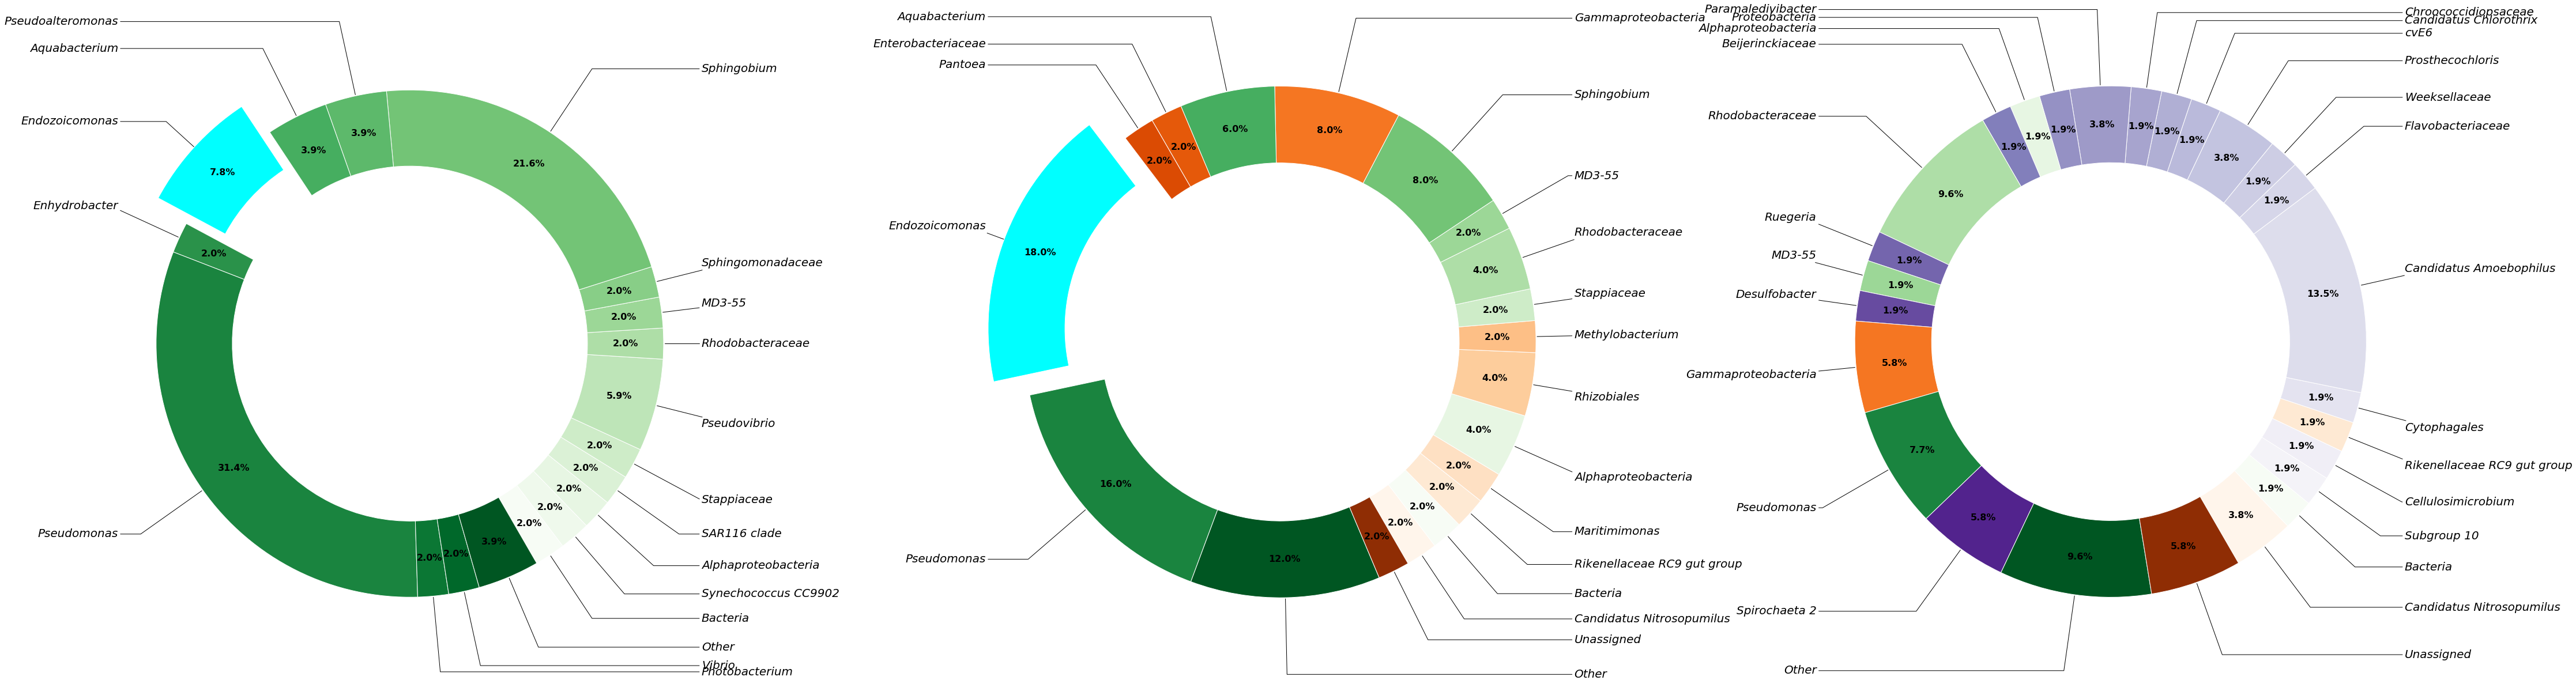

In [208]:
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(75,18))

#axes = [ax2,ax3,ax1]
axes = [ax1,ax2,ax3]
#compartments = ["tissue","skeleton","mucus"]
compartments = ["mucus","tissue","skeleton"]

bright_orange = (255/255,182/255,0/255,1.0)
bright_aqua = (0/255,255/255,255/255,1.0)
bright_pink = (255/255,3/255,214/255,1.0)
colors_by_label = {"Endozoicomonas":bright_aqua}

#cmaps = ["Oranges","Purples","Greens"]
#cmaps = ["turbo","turbo","turbo"]
#cmaps = ["Pastel1","Pastel1","Pastel1"]
cmaps = ["Greens","Oranges","Purples"]

for i,compartment in enumerate(compartments):
    print(i,compartment)
    figure_axis = axes[i]
    print("Figure axis:",figure_axis)
    label_category = f"most_abundant_genus_{compartment}"
    color_category = f"most_abundant_genus_{compartment}"
    
    print("Label category:", label_category)
    print("Color category:", color_category)
    
    cmap = cmaps[i]
    colors_by_label = pie_chart_from_column(merged_table,label_category,\
                      cmap2_column = color_category,cmap2_keyword='zoico',\
                      cmap2_name = 'Pastel1',cmap_name = cmap,figure_axis=figure_axis,\
                      cached_colors = colors_by_label)
    
    #Add annotation to the top right of each subplot
    #number_to_letter = {0:"A",1:"B",2:"C"}
    #subfigure_letter = number_to_letter[i]
    #figure_axis.annotate(subfigure_letter,(0,0))
    
plt.savefig(f"pie_chart_{table_column}_{cmap}.png",dpi=300)
plt.savefig(f"pie_chart_{table_column}_{cmap}.svg",dpi=300)
